<a href="https://colab.research.google.com/github/YounSooKimTech/Joy_Criminology/blob/main/EPA_AirQuality_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
! pip install us

In [11]:
import pandas as pd

df_NBER= pd.read_csv("https://raw.githubusercontent.com/YounSooKimTech/Joy_Criminology/main/Data/NBER_CBSA%20to%20FIPS.csv")
df_NBER = df_NBER[["cbsacode", "statename"]]

In [12]:
df_NBER.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1915 entries, 0 to 1914
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   cbsacode   1915 non-null   int64 
 1   statename  1915 non-null   object
dtypes: int64(1), object(1)
memory usage: 30.0+ KB


In [13]:
import pandas as pd

df= pd.read_excel("/content/airqualitytrendsbycity1990-2022.xlsx", skiprows=3)

df = df.iloc[:-10, :]

df.columns[:5]

Index(['CBSA', 'Core Based Statistical Area', 'Pollutant', 'Trend Statistic',
       'Number of Trend Sites'],
      dtype='object')

In [14]:
df["CBSA"] = df["CBSA"].apply(pd.to_numeric, errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CBSA                         825 non-null    int64  
 1   Core Based Statistical Area  279 non-null    object 
 2   Pollutant                    825 non-null    object 
 3   Trend Statistic              825 non-null    object 
 4   Number of Trend Sites        825 non-null    float64
 5   1990                         435 non-null    float64
 6   1991                         435 non-null    float64
 7   1992                         435 non-null    float64
 8   1993                         435 non-null    float64
 9   1994                         435 non-null    float64
 10  1995                         435 non-null    float64
 11  1996                         435 non-null    float64
 12  1997                         435 non-null    float64
 13  1998                

In [15]:
import pandas as pd

df_merged = pd.merge(df_NBER, df, left_on="cbsacode", right_on="CBSA")

df_grouped = df_merged.groupby(["statename", "Pollutant"]).mean().reset_index()

df_grouped = df_grouped.drop(columns = ["cbsacode", "CBSA",  "Number of Trend Sites"])

df_grouped


<ipython-input-15-fe1b8c232237>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = df_merged.groupby(["statename", "Pollutant"]).mean().reset_index()


,statename,Pollutant,1990,1991,1992,1993,1994,1995,1996,1997,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Alabama,CO,6.400000,6.100000,7.400000,7.100000,6.900000,6.400000,4.900000,5.900000,...,1.700000,2.400000,1.900000,1.400000,1.000000,1.200000,1.200000,1.100000,1.000000,0.800000
1,Alabama,O3,0.081375,0.067750,0.077125,0.079250,0.073125,0.086750,0.082062,0.076938,...,0.063062,0.062938,0.064562,0.065313,0.060062,0.063312,0.065187,0.056063,0.058812,0.061812
2,Alabama,PM10,60.333333,68.733333,51.111111,59.222222,48.333333,50.066667,41.822222,50.444444,...,30.666667,31.400000,59.266667,35.888889,26.822222,29.377778,28.155556,28.377778,27.777778,29.177778
3,Alabama,PM2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14.293333,15.393333,14.166667,11.886667,13.683333,12.856667,12.426667,13.343333,15.080000,13.466667
4,Alabama,SO2,75.000000,81.000000,89.000000,113.000000,85.000000,65.000000,54.000000,60.000000,...,22.000000,17.000000,17.000000,11.000000,12.000000,11.000000,10.000000,5.000000,7.000000,6.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,Wisconsin,PM2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15.126471,16.282353,14.682353,13.017647,12.520588,14.182353,15.067647,13.491176,17.600000,13.929412
204,Wisconsin,SO2,104.400000,134.000000,118.200000,75.400000,70.200000,70.400000,70.000000,75.600000,...,49.600000,50.600000,43.800000,9.400000,8.200000,8.800000,5.400000,5.600000,4.600000,4.800000
205,Wyoming,O3,0.045000,0.047000,0.042000,0.047000,0.042000,0.047000,0.046000,0.048000,...,0.069000,0.065000,0.064000,0.064000,0.066000,0.070000,0.065000,0.066000,0.072000,0.067000
206,Wyoming,PM10,55.266667,61.666667,52.500000,42.900000,47.000000,36.933333,31.066667,35.000000,...,46.666667,42.433333,49.433333,36.900000,59.933333,42.000000,36.000000,63.933333,64.100000,59.733333


In [21]:
import us

def state_name_to_abbreviation(state_name):
    state = us.states.lookup(state_name)
    if state:
        return state.abbr
    else:
        return state_name  # Return the original name if it's not found

# Assuming df is your DataFrame
# Use the apply method to replace full state names with abbreviations in the "Area" column
df_grouped['State'] = df_grouped['statename'].apply(state_name_to_abbreviation)
df_grouped = df_grouped[['State'] + [col for col in df_grouped.columns if col != 'State']]
df_grouped["State"] = df_grouped["State"].str.replace("District of Columbia", "DC")


In [22]:
df_grouped["State"].value_counts()

TX    6
NJ    6
VA    6
IN    6
IL    6
FL    6
PA    6
WV    6
CO    6
CA    6
NY    6
LA    5
MO    5
MN    5
NM    5
MI    5
AL    5
VT    5
KY    5
HI    5
AZ    5
WI    5
MD    4
OH    4
ND    4
NC    4
NH    4
SC    4
DC    4
GA    4
IA    4
MA    4
OR    4
TN    3
WA    3
UT    3
RI    3
MT    3
OK    3
NV    3
NE    3
KS    3
DE    3
CT    3
WY    3
AK    2
AR    2
PR    1
MS    1
ME    1
Name: State, dtype: int64

In [23]:
#df_grouped.to_csv("EPA_AirPollutants_Yearly.csv", index=False)

# Melt the dataframe

In [31]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/YounSooKimTech/Joy_Criminology/main/Data/EPA_AirPollutants_Yearly.csv")

In [37]:
df = df.drop("statename", axis=1)
df

,State,Pollutant,1990,1991,1992,1993,1994,1995,1996,1997,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,AL,CO,6.400000,6.100000,7.400000,7.100000,6.900000,6.400000,4.900000,5.900000,...,1.700000,2.400000,1.900000,1.400000,1.000000,1.200000,1.200000,1.100000,1.000000,0.800000
1,AL,O3,0.081375,0.067750,0.077125,0.079250,0.073125,0.086750,0.082062,0.076938,...,0.063062,0.062937,0.064562,0.065312,0.060062,0.063312,0.065187,0.056063,0.058812,0.061812
2,AL,PM10,60.333333,68.733333,51.111111,59.222222,48.333333,50.066667,41.822222,50.444444,...,30.666667,31.400000,59.266667,35.888889,26.822222,29.377778,28.155556,28.377778,27.777778,29.177778
3,AL,PM2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14.293333,15.393333,14.166667,11.886667,13.683333,12.856667,12.426667,13.343333,15.080000,13.466667
4,AL,SO2,75.000000,81.000000,89.000000,113.000000,85.000000,65.000000,54.000000,60.000000,...,22.000000,17.000000,17.000000,11.000000,12.000000,11.000000,10.000000,5.000000,7.000000,6.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,WI,PM2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15.126471,16.282353,14.682353,13.017647,12.520588,14.182353,15.067647,13.491176,17.600000,13.929412
204,WI,SO2,104.400000,134.000000,118.200000,75.400000,70.200000,70.400000,70.000000,75.600000,...,49.600000,50.600000,43.800000,9.400000,8.200000,8.800000,5.400000,5.600000,4.600000,4.800000
205,WY,O3,0.045000,0.047000,0.042000,0.047000,0.042000,0.047000,0.046000,0.048000,...,0.069000,0.065000,0.064000,0.064000,0.066000,0.070000,0.065000,0.066000,0.072000,0.067000
206,WY,PM10,55.266667,61.666667,52.500000,42.900000,47.000000,36.933333,31.066667,35.000000,...,46.666667,42.433333,49.433333,36.900000,59.933333,42.000000,36.000000,63.933333,64.100000,59.733333


In [38]:
df_long = pd.melt(df, id_vars=["State", "Pollutant"], var_name = "Year", value_name = "Observed_Value")
df_long

,State,Pollutant,Year,Observed_Value
0,AL,CO,1990,6.400000
1,AL,O3,1990,0.081375
2,AL,PM10,1990,60.333333
3,AL,PM2.5,1990,NaN
4,AL,SO2,1990,75.000000
...,...,...,...,...
6859,WI,PM2.5,2022,13.929412
6860,WI,SO2,2022,4.800000
6861,WY,O3,2022,0.067000
6862,WY,PM10,2022,59.733333


In [50]:
df_long.to_csv("EPA_AirPollutants_Yearly.csv", index=False)

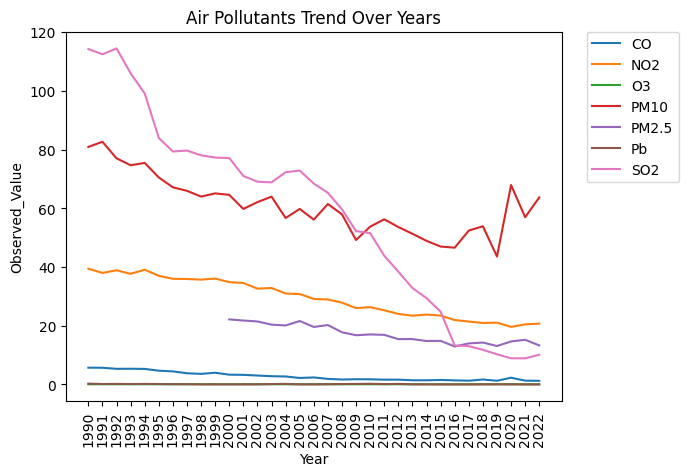

In [49]:
temp = df_long.groupby(["Year", "Pollutant"])["Observed_Value"].mean().reset_index()
temp

import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data=temp, x="Year", y="Observed_Value", hue="Pollutant")
plt.title("Air Pollutants Trend Over Years")
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

plt.show()

# Geo Heatmap

In [51]:
! pip install plotly
! pip install -U kaleido

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [64]:
df_PM25 = df_long[df_long["Pollutant"] == "PM2.5"]
df_PM25 = df_PM25.dropna()
df_PM25.head(2)

df_PM25["Observed_Value"].describe()

count    1104.000000
mean       17.133481
std         5.306551
min         4.350000
25%        13.434984
50%        16.210000
75%        20.700000
max        39.275000
Name: Observed_Value, dtype: float64

In [65]:
import plotly.express as px
import kaleido

fig = px.choropleth(df_PM25,
                    locations="State",
                    locationmode='USA-states',
                    color="Observed_Value",
                    range_color = [4,25],
                    color_continuous_scale="Jet",
                    scope='usa',
                    animation_frame='Year',
                    title = "PM2.5 Over the Years")
fig.show()